# Predictive Analysis Report: Top 5 Products by March 28, 2025  

## Data Source  
The data was scraped from the `#check-in` channel on Slack, capturing daily scores of various products. The dataset includes historical trends, which were used to forecast future performance.  

## Methodology  
1. **Data Processing**:  
   - The dataset was loaded and converted into a structured format.  
   - Date values were standardized, and only data from March 24-25, 2025, was used for current trends.  
   - Past data before March 24 was used to compute average daily growth rates.  

2. **Prediction Approach**:  
   - The historical daily growth rate of each product was calculated.  
   - Scores were projected for March 26-28, based on the average growth trend.  
   - The total predicted scores for March 24-28 were computed.  
   - The top 5 products with the highest cumulative scores were selected.  

## Results  
### Predicted Top 5 Products by Friday (March 28, 2025):  
1. **TechiesMatch** - 219.14  
2. **ShopDesk** - 215.21  
3. **Backend.IM** - 208.40  
4. **Telex** - 156.14  
5. **ReconXi** - 140.90  

## Visualization  
The plotted graph shows the projected growth of these top 5 products over the next few days, illustrating their upward trends.  

![Predicted Chart](output.png)  

## Conclusion  
The analysis indicates that *TechiesMatch*, *ShopDesk*, and *Backend.IM* are likely to lead the rankings by March 28, 2025. The steady upward trends suggest consistent growth. Future predictions can be improved with more data points and additional influencing factors.  

---
**Prepared by:** Adordev 
**Date:** March 25, 2025  



Predicted Top 5 Products by Friday (March 28, 2025):
TechiesMatch: 219.14
ShopDesk: 215.21
Backend.IM: 208.40
Telex: 156.14
ReconXi: 140.90


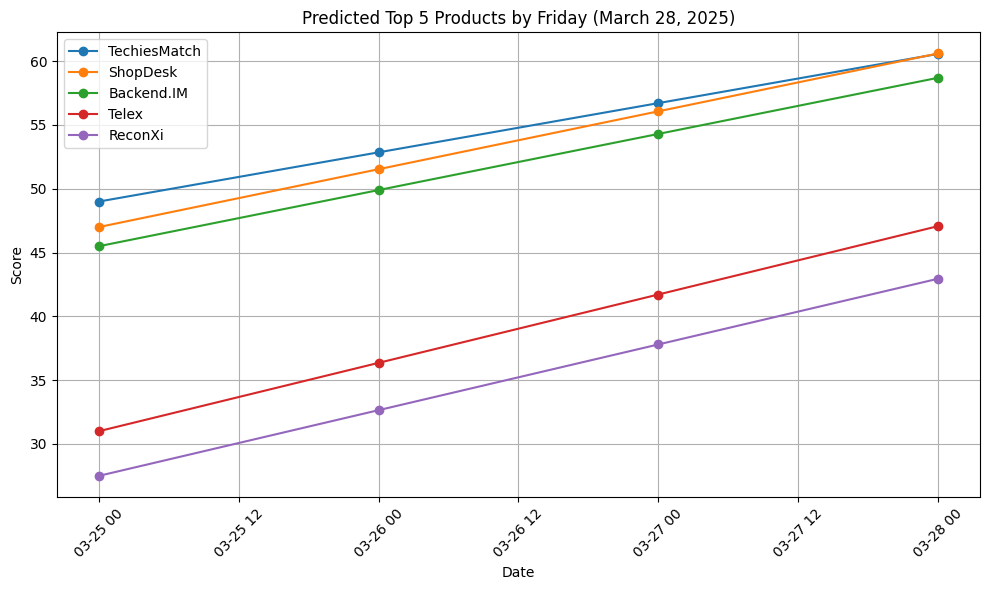

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('daily_scores.csv')
df = data.copy()

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter for current week (March 24-25)
current_week = df[df['Date'] >= '2025-03-24'].copy()

# Calculate daily growth rates from previous weeks
prev_weeks = df[df['Date'] < '2025-03-24'].copy()
weekly_avg_growth = {}
products = df.columns[1:]  # Exclude Date column

for product in products:
    # Calculate average daily growth rate from previous weeks
    daily_diff = prev_weeks[product].diff().dropna()
    avg_growth = daily_diff.mean()
    weekly_avg_growth[product] = avg_growth

# Predict scores for remaining days (March 26-28)
future_dates = pd.date_range(start='2025-03-26', end='2025-03-28')
predictions = current_week.tail(1).copy()

for date in future_dates:
    last_row = predictions.tail(1).copy()
    new_row = last_row.copy()
    new_row['Date'] = date
    for product in products:
        new_row[product] = last_row[product].values[0] + weekly_avg_growth[product]
        if new_row[product].values[0] < 0:  # Ensure no negative scores
            new_row[product] = 0
    predictions = pd.concat([predictions, new_row], ignore_index=True)

# Calculate total scores for the week (sum of March 24-28)
weekly_totals = predictions[products].sum()

# Get top 5 products
top_5 = weekly_totals.nlargest(5)

# Prepare data for plotting (only top 5)
plot_data = predictions[['Date'] + top_5.index.tolist()]
plot_data.set_index('Date', inplace=True)

# Create visualization
plt.figure(figsize=(10, 6))
for product in top_5.index:
    plt.plot(plot_data.index, plot_data[product], marker='o', label=product)

plt.title('Predicted Top 5 Products by Friday (March 28, 2025)')
plt.xlabel('Date')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Print top 5 predictions
print("Predicted Top 5 Products by Friday (March 28, 2025):")
for product, score in top_5.items():
    print(f"{product}: {score:.2f}")

# Display the plot
plt.show()